# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(
    '../dataset/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [4]:
print(df.shape)
df.describe()

(18442, 9)


,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000


In [5]:
df['Recommended IND'].value_counts()

Recommended IND
1    15053
0     3389
Name: count, dtype: int64

In [6]:
satisfaction_rate = df['Recommended IND'].value_counts()[1] / len(df['Recommended IND']) * 100

print(f'Satisfaction Rate = %{satisfaction_rate:.2f}')

Satisfaction Rate = %81.62


''

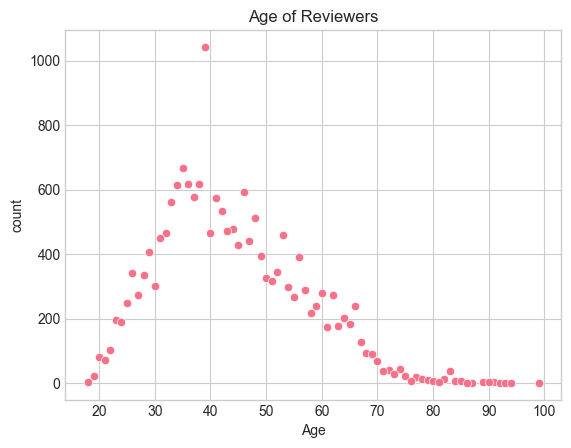

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


age_dist = df['Age'].value_counts()

sns.scatterplot(age_dist)

plt.title('Age of Reviewers')
;

Most reviewers are in the range of 30-60 years old 

C:\Users\OG\AppData\Local\Temp\ipykernel_688\3521637641.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rec = df.groupby('Age_Group')['Recommended IND'].agg(['count'])


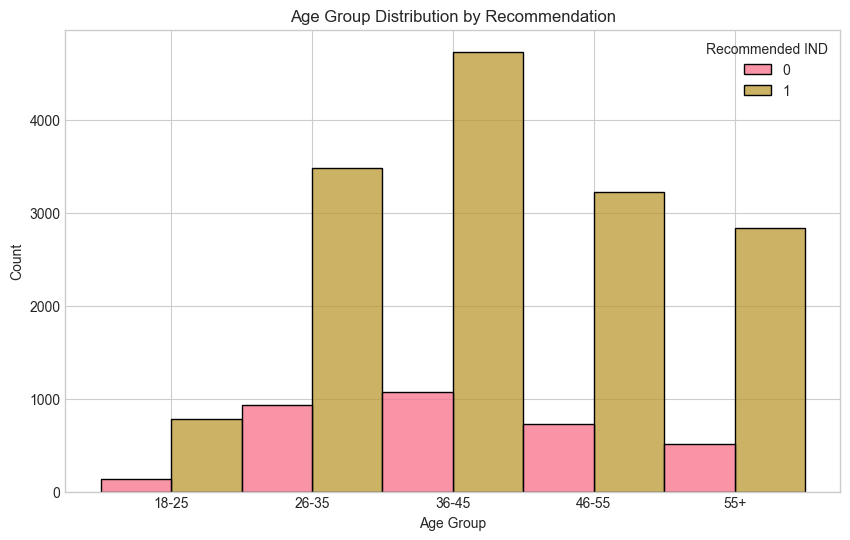

''

In [8]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45',
'46-55', '55+'])
age_rec = df.groupby('Age_Group')['Recommended IND'].agg(['count'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_Group', hue='Recommended IND', multiple='dodge', stat='count')
plt.title('Age Group Distribution by Recommendation')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
;

Text(0.5, 1.0, 'Departments count of Reviews')

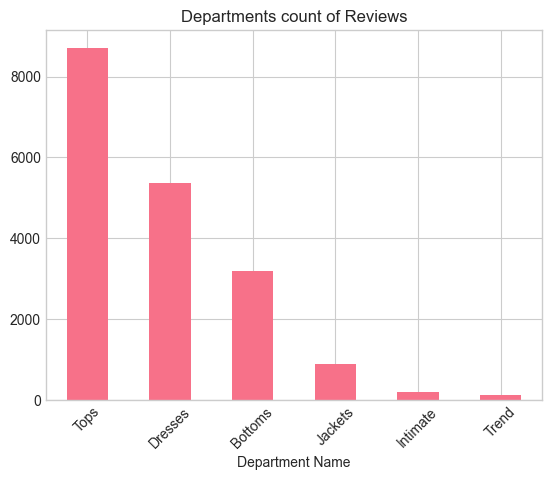

In [9]:
df['Department Name'].value_counts().plot(kind= 'bar', rot= 45)
plt.title('Departments count of Reviews')

Text(0.5, 1.0, 'Classes count of Reviews')

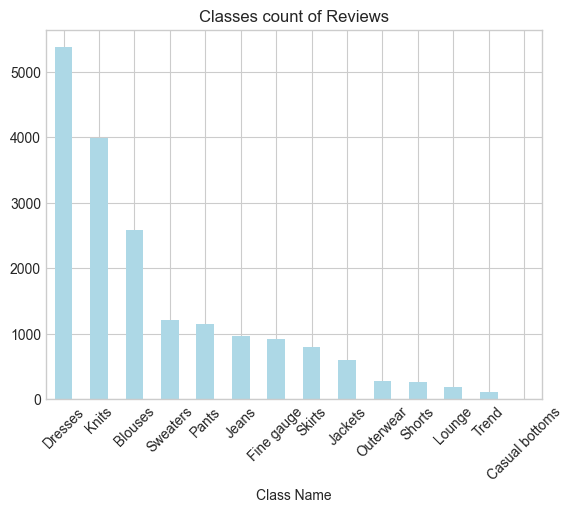

In [10]:
df['Class Name'].value_counts().plot(kind= 'bar', rot= 45, color= 'lightblue')
plt.title('Classes count of Reviews')

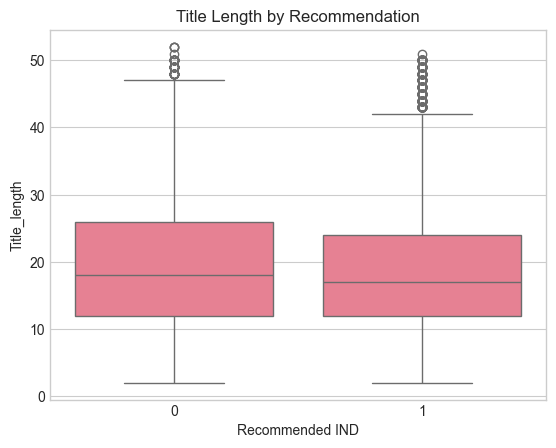

''

In [11]:
# lets explore text columns more
df['Title_length'] = df['Title'].str.len()
df['Review_length'] = df['Review Text'].str.len()

sns.boxplot(data=df, x='Recommended IND', y='Title_length')
plt.title('Title Length by Recommendation')
plt.show()
;

In [12]:
df['Title_word_count'] = df['Title'].str.split().str.len()
df['Review_word_count'] = df['Review Text'].str.split().str.len()

print(df.groupby('Recommended IND')[['Title_word_count', 'Review_word_count']].median())

                 Title_word_count  Review_word_count
Recommended IND                                     
0                             3.0               64.0
1                             3.0               62.0


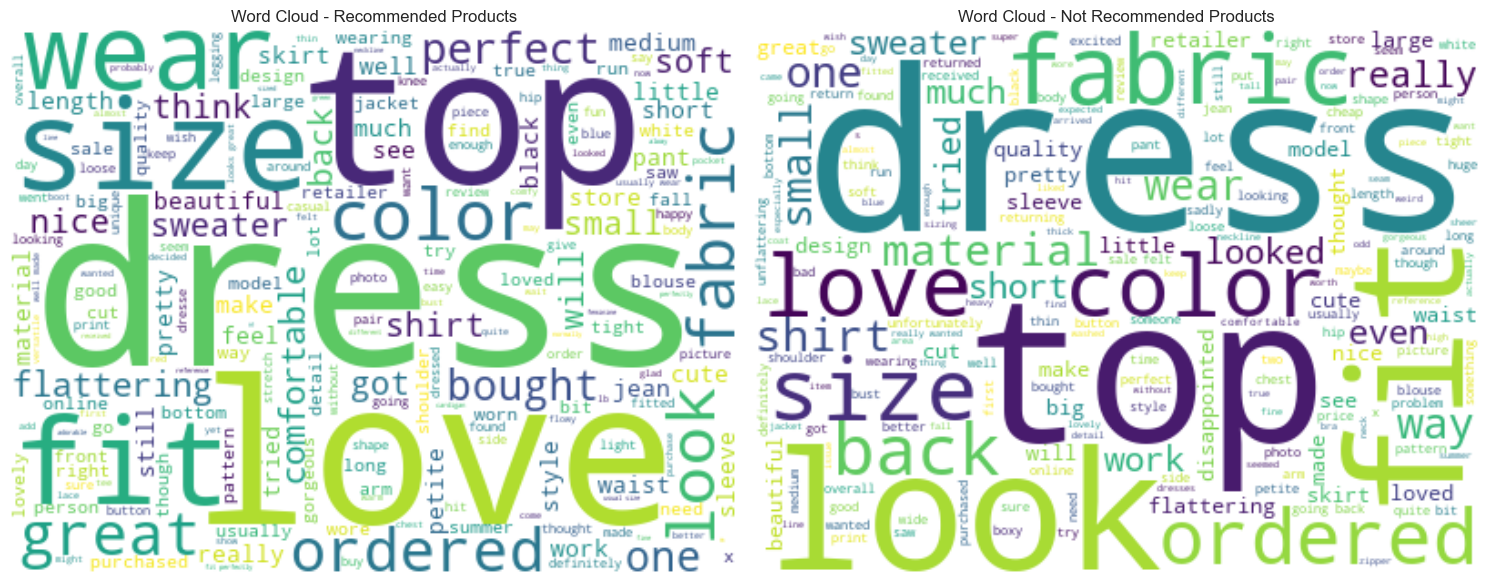

In [13]:
from wordcloud import WordCloud

# Word cloud for recommended products
recommended_text = ' '.join(df[df['Recommended IND'] == 1]['Review Text'].astype(str))    
not_recommended_text = ' '.join(df[df['Recommended IND'] == 0]['Review Text'].astype(str))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Recommended reviews word cloud
wc_recommended = WordCloud(width=400, height=300, background_color='white').generate(recommended_text)
ax1.imshow(wc_recommended, interpolation='bilinear')
ax1.set_title('Word Cloud - Recommended Products')
ax1.axis('off')

# Not recommended reviews word cloud
wc_not_recommended = WordCloud(width=400, height=300,
background_color='white').generate(not_recommended_text)
ax2.imshow(wc_not_recommended, interpolation='bilinear')
ax2.set_title('Word Cloud - Not Recommended Products')
ax2.axis('off')

plt.tight_layout()
plt.show()


Both positive and negative reviews talk about “size,” “fit,” and “dress” a lot, but the difference is in sentiment:

- Positive reviews: “love the fit,” “size is perfect.”

- Negative reviews: “size too small,” “fit weird,” “returning.”

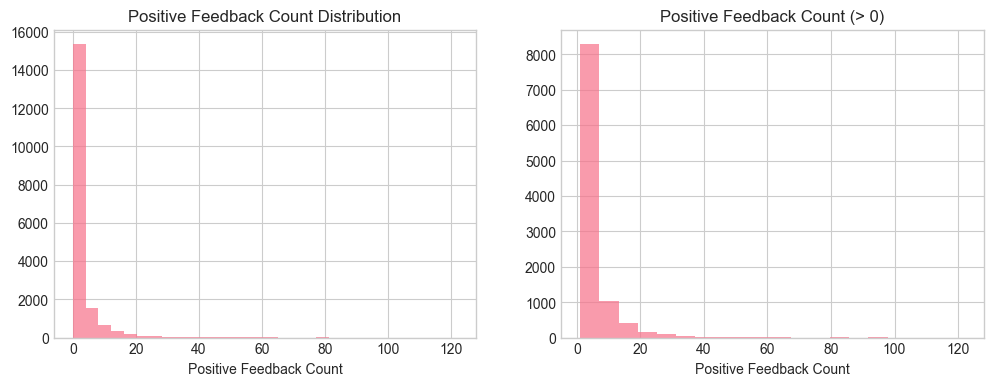

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Positive Feedback Count'].hist(bins=30, alpha=0.7)
plt.title('Positive Feedback Count Distribution')
plt.xlabel('Positive Feedback Count')

plt.subplot(1, 2, 2)
df[df['Positive Feedback Count'] > 0]['Positive Feedback Count'].hist(bins=20, alpha=0.7)
plt.title('Positive Feedback Count (> 0)')
plt.xlabel('Positive Feedback Count')
plt.show()

it appears that most of the reviews havent got a positive feedback from other customers, or merely got one

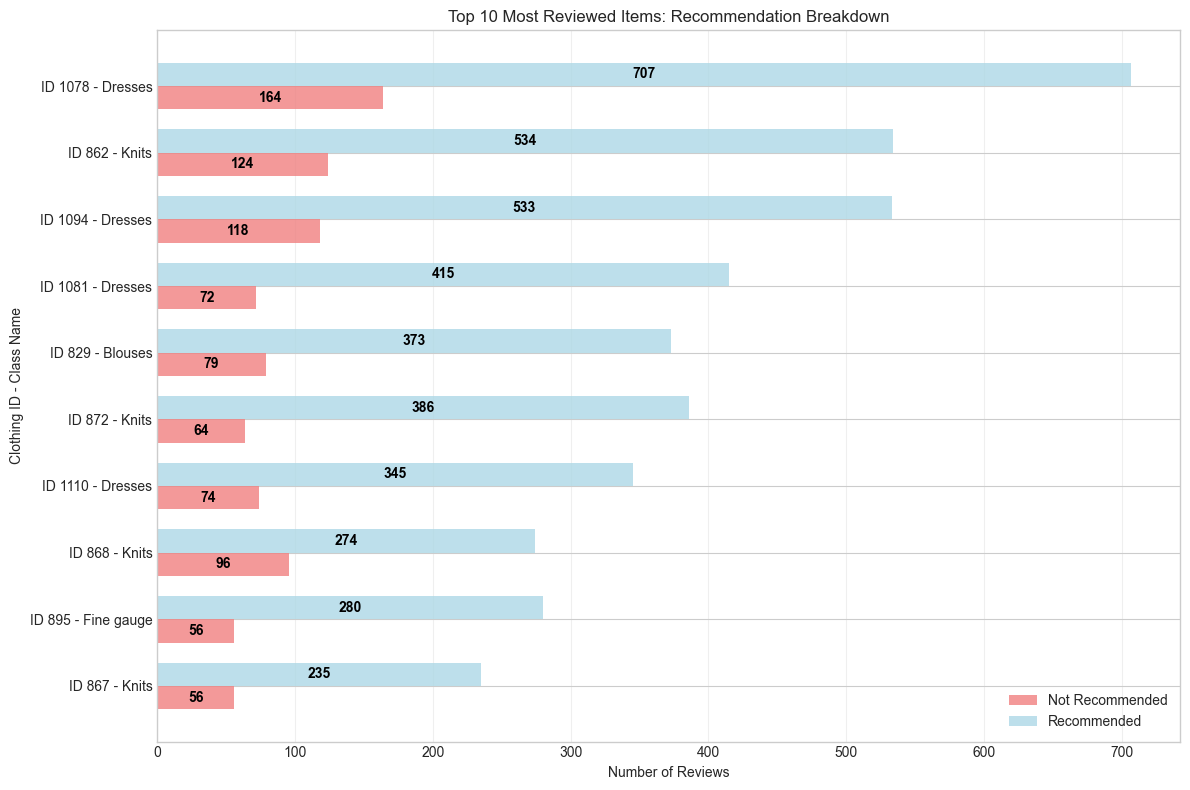

In [15]:
# Top 10 most reviewed clothing items with recommendation breakdown
top_items = df['Clothing ID'].value_counts().head(10).sort_values().index

# Filter data for top 10 items and create summary
top_items_data = df[df['Clothing ID'].isin(top_items)]
clothing_summary = top_items_data.groupby(['Clothing ID', 'Recommended IND']).size().unstack(fill_value=0)
clothing_summary = clothing_summary.loc[top_items]  # Maintain order by review count

# Get class names for each clothing ID
class_names = df.drop_duplicates('Clothing ID').set_index('Clothing ID')['Class Name']

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
width = 0.35
y_pos = range(len(clothing_summary))

# Create bars
bars1 = plt.barh([y - width/2 for y in y_pos], clothing_summary[0], width, 
                 label='Not Recommended', color='lightcoral', alpha=0.8)
bars2 = plt.barh([y + width/2 for y in y_pos], clothing_summary[1], width,
                 label='Recommended', color='lightblue', alpha=0.8)

# Customize plot with class names
y_labels = [f'ID {idx} - {class_names[idx]}' for idx in clothing_summary.index]
plt.yticks(y_pos, y_labels)
plt.xlabel('Number of Reviews')
plt.ylabel('Clothing ID - Class Name')
plt.title('Top 10 Most Reviewed Items: Recommendation Breakdown')
plt.legend()
plt.grid(axis='x', alpha=0.3)

# Add labels inside bars
for i, clothing_id in enumerate(clothing_summary.index):
    not_rec = clothing_summary.loc[clothing_id, 0]
    rec = clothing_summary.loc[clothing_id, 1]
    
    # Add labels inside bars if they're wide enough
    if not_rec > 3:  # Only add label if bar is wide enough
        plt.text(not_rec/2, i - width/2, str(not_rec), ha='center', va='center', 
                fontweight='bold', color='black')
    if rec > 3:
        plt.text(rec/2, i + width/2, str(rec), ha='center', va='center', 
                fontweight='bold', color='black')

plt.tight_layout()
plt.show()


- Dresses are the most popular with high engagement, but also significant negative reviews.
- Knits have relatively more negative reviews, people dont like our lineup!
- Blouses and Fine Gauge knits have fewer reviews but high satisfaction.

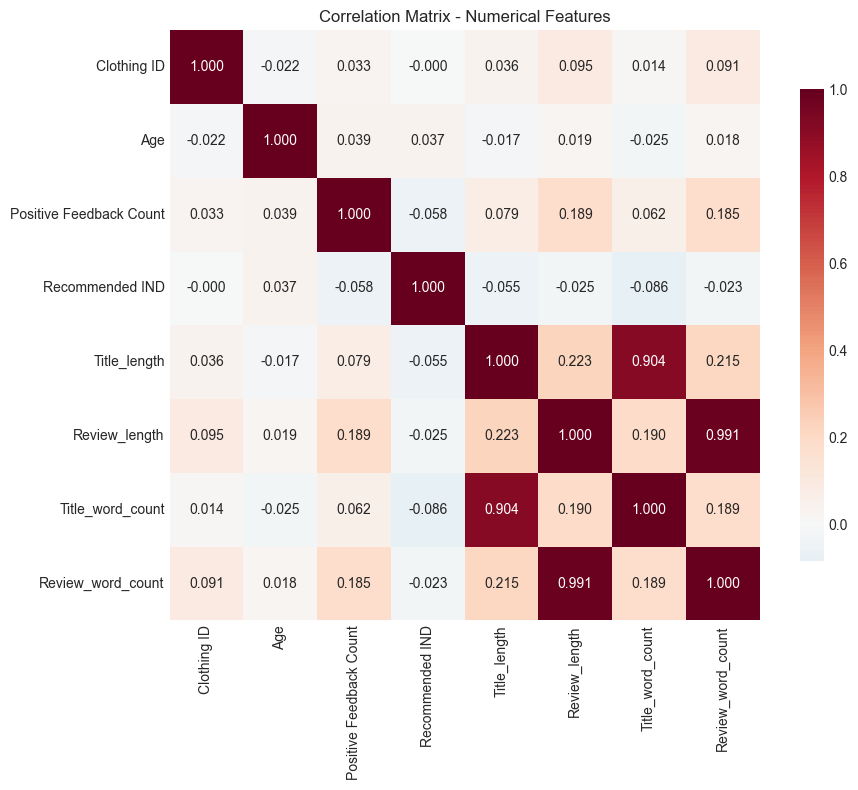

In [16]:
# Correlation matrix for numerical features
numerical_cols = ['Clothing ID', 'Age', 'Positive Feedback Count', 'Recommended IND', 
                  'Title_length', 'Review_length', 'Title_word_count', 'Review_word_count']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

## Building Pipeline

Since we are working mostly with text data, we need to do the following:
1. Normalizing the text (lower case, remove numbers, punctuations and special characters)
2. Handle stopwords like the, and, of
3. Tokenization
4. Lemmatization (important to keep word's context)
5. Feature engineering 

and also we need to handle the imbalance in the `target`




In [17]:
import spacy
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    Custom text preprocessing transformer for scikit-learn pipelines using spaCy
    Performs: normalization, stopword removal, tokenization, lemmatization
    """
    
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """Transform text data through preprocessing steps"""
        return [self._preprocess_text(text) for text in X]
    
    def _preprocess_text(self, text):
        """Apply all preprocessing steps to a single text"""
        if pd.isna(text) or text == '':
            return ''
        
        # 1. Normalize text (lowercase)
        text = text.lower()
        
        # Process with spaCy
        doc = self.nlp(text)
        
        # 2, 3, 4: Tokenization, stopword removal, lemmatization in one step
        tokens = [token.lemma_ for token in doc 
                 if not token.is_stop and not token.is_punct 
                 and not token.is_space and token.is_alpha]
        
        # Return as single string for TF-IDF compatibility
        return ' '.join(tokens)

# Test the preprocessor
preprocessor = TextPreprocessor()

# Test with sample text
sample_texts = [
    "I love this dress! It's amazing and fits perfectly.",
    "The quality is terrible, very disappointing product."
]

processed_texts = preprocessor.transform(sample_texts)
print("Original vs Processed Text:")
for orig, proc in zip(sample_texts, processed_texts):
    print(f"Original: {orig}")
    print(f"Processed: {proc}")
    print()

Original vs Processed Text:
Original: I love this dress! It's amazing and fits perfectly.
Processed: love dress amazing fit perfectly

Original: The quality is terrible, very disappointing product.
Processed: quality terrible disappointing product



In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# Define column types for preprocessing
text_cols = ['Title', 'Review Text']
categorical_cols = ['Division Name', 'Department Name', 'Class Name'] 
numerical_cols = ['Clothing ID', 'Age', 'Positive Feedback Count']

# Create preprocessing pipelines for each data type
text_pipeline = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer([
    ('text_title', text_pipeline, 'Title'),
    ('text_review', text_pipeline, 'Review Text'), 
    ('categorical', categorical_pipeline, categorical_cols),
    ('numerical', numerical_pipeline, numerical_cols)
], remainder='drop')

print("Preprocessor created successfully!")

Preprocessor created successfully!


In [19]:
from textblob import TextBlob

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        
        # Text length features
        X_new['title_length'] = X['Title'].str.len()
        X_new['review_length'] = X['Review Text'].str.len()
        X_new['title_word_count'] = X['Title'].str.split().str.len()
        X_new['review_word_count'] = X['Review Text'].str.split().str.len()
        
        # Sentiment analysis
        X_new['review_sentiment'] = X['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
        
        # Age groups 
        X_new['age_group'] = pd.cut(X['Age'], 
                                   bins=[0, 25, 35, 45, 55, 100], 
                                   labels=['18-25', '26-35', '36-45', '46-55', '55+'])
        
        # Feedback ratio (normalized by age - older customers might get more feedback)
        X_new['feedback_per_age'] = X['Positive Feedback Count'] / (X['Age'] + 1)
        
        return X_new

# Test feature engineering
feature_engineer = FeatureEngineer()
X_train_engineered = feature_engineer.fit_transform(X_train)

print("New features added:")
print(X_train_engineered[['title_length', 'review_length', 'title_word_count', 
                         'review_word_count', 'review_sentiment', 'age_group', 'feedback_per_age']].head())

New features added:
       title_length  review_length  title_word_count  review_word_count  \
893              33            176                 6                 34   
1767             21            332                 4                 65   
4491              7            469                 2                 84   
17626            11            221                 2                 46   
11184            24            389                 3                 68   

       review_sentiment age_group  feedback_per_age  
893            0.257011     36-45          0.052632  
1767           0.396250     18-25          0.000000  
4491           0.204762     36-45          0.238095  
17626          0.075000     46-55          0.113208  
11184         -0.067430     26-35          0.103448  


In [20]:
engineered_numerical_cols = ['Clothing ID', 'Age', 'Positive Feedback Count', 
                           'title_length', 'review_length', 'title_word_count', 
                           'review_word_count', 'review_sentiment', 'feedback_per_age']
engineered_categorical_cols = ['Division Name', 'Department Name', 'Class Name', 'age_group']

# preprocessing pipeline
final_preprocessor = ColumnTransformer([
    ('text_title', text_pipeline, 'Title'),
    ('text_review', text_pipeline, 'Review Text'), 
    ('categorical', categorical_pipeline, engineered_categorical_cols),
    ('numerical', numerical_pipeline, engineered_numerical_cols)
], remainder='drop')

# Complete pipeline with feature engineering
complete_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', final_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

print("Complete pipeline created with feature engineering!")

Complete pipeline created with feature engineering!


## Training Pipeline

In [21]:
# Import required libraries
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint, uniform
import joblib
import os

# Create cache directory to transform data once
cache_dir = '../cache'
os.makedirs(cache_dir, exist_ok=True)

print("Preprocessing training data...")
preprocessing_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', final_preprocessor)
])

X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Save preprocessed data to cache to be used each new fold
joblib.dump(X_train_processed, f'{cache_dir}/X_train_processed.pkl')
joblib.dump(X_test_processed, f'{cache_dir}/X_test_processed.pkl')
joblib.dump(preprocessing_pipeline, f'{cache_dir}/preprocessing_pipeline.pkl')

print(f"Preprocessed data cached. Shape: {X_train_processed.shape}")
print("Ready for model training!")

Preprocessing training data...
Preprocessed data cached. Shape: (16597, 2036)
Ready for model training!


In [22]:
# Train RandomForest with RandomizedSearchCV
print("Training RandomForest...")

rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_random_search = RandomizedSearchCV(
    rf_model, 
    rf_param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random_search.fit(X_train_processed, y_train)

print(f"RandomForest - Best CV F1 Score: {rf_random_search.best_score_:.4f}")
print(f"RandomForest - Best Parameters: {rf_random_search.best_params_}")

Training RandomForest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomForest - Best CV F1 Score: 0.9324
RandomForest - Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 183}


In [23]:
# Train SVC with RandomizedSearchCV
print("Training SVC...")

svc_param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(5))
}

svc_model = SVC(random_state=42, class_weight='balanced')
svc_random_search = RandomizedSearchCV(
    svc_model,
    svc_param_dist,
    n_iter=15,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

svc_random_search.fit(X_train_processed, y_train)

print(f"SVC - Best CV F1 Score: {svc_random_search.best_score_:.4f}")
print(f"SVC - Best Parameters: {svc_random_search.best_params_}")

Training SVC...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
SVC - Best CV F1 Score: 0.9224
SVC - Best Parameters: {'C': np.float64(5.347746602583891), 'gamma': np.float64(0.20956447000118328), 'kernel': 'rbf'}


In [24]:
# Train LogisticRegression with RandomizedSearchCV
print("Training LogisticRegression...")

# Fixed parameter distribution - ensuring solver-penalty compatibility
lr_param_dist = {
    'C': uniform(0.01, 10),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': randint(500, 2000)
}

lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_random_search = RandomizedSearchCV(
    lr_model,
    lr_param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lr_random_search.fit(X_train_processed, y_train)

print(f"LogisticRegression - Best CV F1 Score: {lr_random_search.best_score_:.4f}")
print(f"LogisticRegression - Best Parameters: {lr_random_search.best_params_}")

# Store all best models
best_models = {
    'random_forest': rf_random_search,
    'svc': svc_random_search,
    'logistic_regression': lr_random_search
}

print("\nAll models trained successfully!")

Training LogisticRegression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
LogisticRegression - Best CV F1 Score: 0.9258
LogisticRegression - Best Parameters: {'C': np.float64(1.4386681792194078), 'max_iter': 630, 'solver': 'liblinear'}

All models trained successfully!


DETAILED MODEL EVALUATION ON TEST SET

RANDOM_FOREST EVALUATION
Test Accuracy: 0.8818
Test F1 Score: 0.9300
CV F1 Score: 0.9324
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 183}
Classification Report:
----------------------------------------
                 precision    recall  f1-score   support

Not Recommended       0.72      0.55      0.62       327
    Recommended       0.91      0.95      0.93      1518

       accuracy                           0.88      1845
      macro avg       0.81      0.75      0.78      1845
   weighted avg       0.87      0.88      0.88      1845

Confusion Matrix:
----------------------------------------


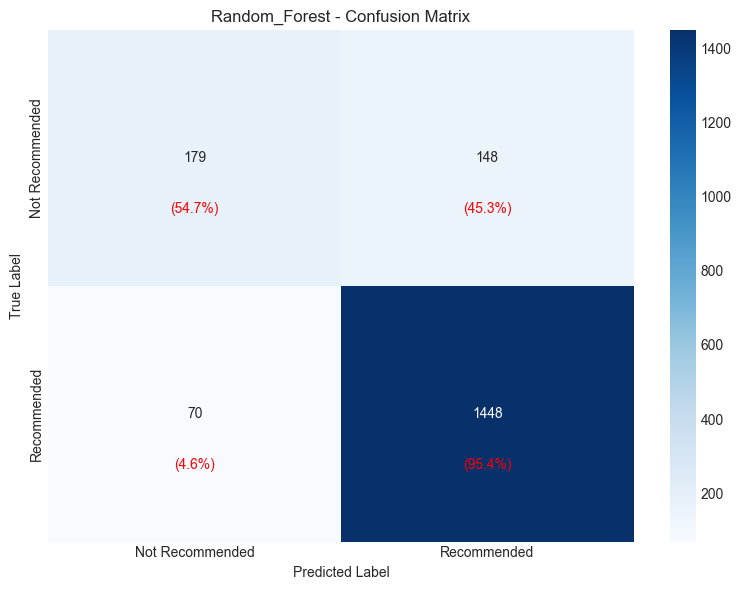

Confusion Matrix Breakdown:
True Negatives (Correctly Not Recommended): 179
False Positives (Incorrectly Recommended): 148
False Negatives (Incorrectly Not Recommended): 70
True Positives (Correctly Recommended): 1448

SVC EVALUATION
Test Accuracy: 0.8721
Test F1 Score: 0.9256
CV F1 Score: 0.9224
Best Parameters: {'C': np.float64(5.347746602583891), 'gamma': np.float64(0.20956447000118328), 'kernel': 'rbf'}
Classification Report:
----------------------------------------
                 precision    recall  f1-score   support

Not Recommended       0.74      0.43      0.54       327
    Recommended       0.89      0.97      0.93      1518

       accuracy                           0.87      1845
      macro avg       0.81      0.70      0.74      1845
   weighted avg       0.86      0.87      0.86      1845

Confusion Matrix:
----------------------------------------


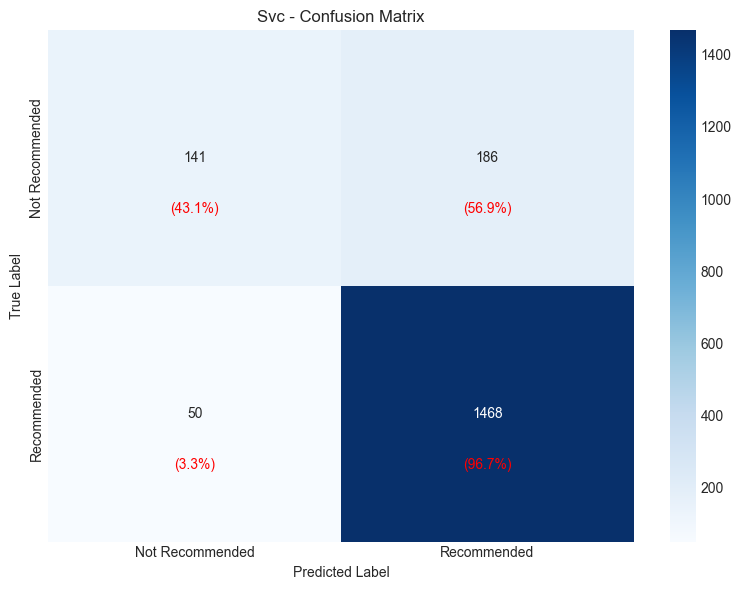

Confusion Matrix Breakdown:
True Negatives (Correctly Not Recommended): 141
False Positives (Incorrectly Recommended): 186
False Negatives (Incorrectly Not Recommended): 50
True Positives (Correctly Recommended): 1468

LOGISTIC_REGRESSION EVALUATION
Test Accuracy: 0.8743
Test F1 Score: 0.9199
CV F1 Score: 0.9258
Best Parameters: {'C': np.float64(1.4386681792194078), 'max_iter': 630, 'solver': 'liblinear'}
Classification Report:
----------------------------------------
                 precision    recall  f1-score   support

Not Recommended       0.60      0.86      0.71       327
    Recommended       0.97      0.88      0.92      1518

       accuracy                           0.87      1845
      macro avg       0.78      0.87      0.81      1845
   weighted avg       0.90      0.87      0.88      1845

Confusion Matrix:
----------------------------------------


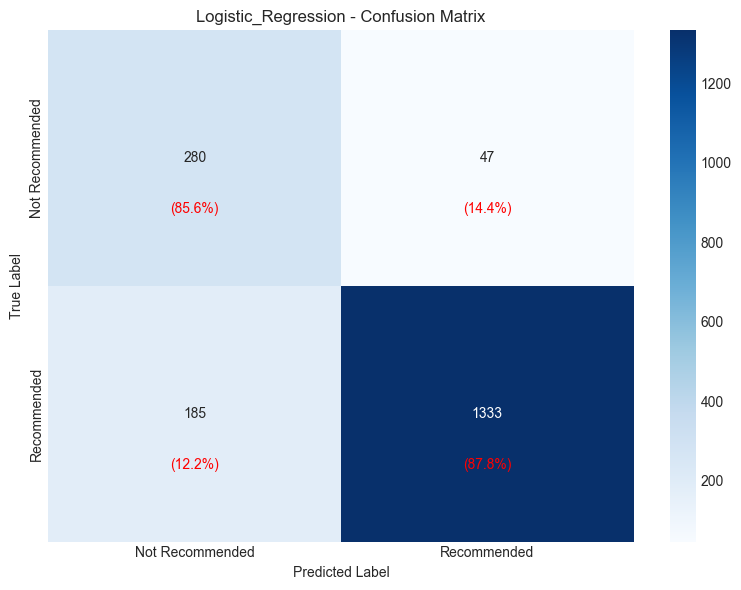

Confusion Matrix Breakdown:
True Negatives (Correctly Not Recommended): 280
False Positives (Incorrectly Recommended): 47
False Negatives (Incorrectly Not Recommended): 185
True Positives (Correctly Recommended): 1333

MODEL COMPARISON SUMMARY
                 Model  Test Accuracy  Test F1 Score  CV F1 Score
0        random_forest         0.8818         0.9300       0.9324
2  logistic_regression         0.8743         0.9199       0.9258
1                  svc         0.8721         0.9256       0.9224

EVALUATION COMPLETE!


In [25]:
# Compare all models on test set with detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = {}

print("=" * 80)
print("DETAILED MODEL EVALUATION ON TEST SET")
print("=" * 80)

for model_name, random_search in best_models.items():
    print(f"\n{'='*60}")
    print(f"{model_name.upper()} EVALUATION")
    print(f"{'='*60}")
    
    # Make predictions on preprocessed test data using best_estimator_
    y_pred = random_search.best_estimator_.predict(X_test_processed)
    
    # Check if model has predict_proba method
    if hasattr(random_search.best_estimator_, 'predict_proba'):
        y_pred_proba = random_search.best_estimator_.predict_proba(X_test_processed)[:, 1]
    else:
        y_pred_proba = None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'best_params': random_search.best_params_,
        'best_cv_score': random_search.best_score_,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print metrics
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(f"CV F1 Score: {random_search.best_score_:.4f}")
    print(f"Best Parameters: {random_search.best_params_}")
    
    # Classification Report
    print(f"Classification Report:")
    print("-" * 40)
    print(classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended']))
    
    # Confusion Matrix
    print(f"Confusion Matrix:")
    print("-" * 40)
    cm = confusion_matrix(y_test, y_pred)
    
    # Create confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.title(f'{model_name.title()} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add percentage annotations
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    for i in range(2):
        for j in range(2):
            plt.text(j+0.5, i+0.7, f'({cm_percent[i, j]:.1%})', 
                    ha='center', va='center', fontsize=10, color='red')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Confusion Matrix Breakdown:")
    print(f"True Negatives (Correctly Not Recommended): {cm[0,0]}")
    print(f"False Positives (Incorrectly Recommended): {cm[0,1]}")
    print(f"False Negatives (Incorrectly Not Recommended): {cm[1,0]}")
    print(f"True Positives (Correctly Recommended): {cm[1,1]}")

print(f"\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Test F1 Score': [results[m]['f1_score'] for m in results.keys()],
    'CV F1 Score': [results[m]['best_cv_score'] for m in results.keys()]
})

# Sort by test accuracy
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print(comparison_df.round(4))




print(f"\n{'='*80}")
print("EVALUATION COMPLETE!")
print(f"{'='*80}")

In [26]:
best_final_model = best_models['logistic_regression']

# Create final pipeline with best model
final_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', final_preprocessor),
    ('classifier', best_final_model.best_estimator_)
])

# Save the complete pipeline
joblib.dump(final_pipeline, f'{cache_dir}/best_model_pipeline.pkl')

['../cache/best_model_pipeline.pkl']